In [5]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
file_name = 'experiment_csv/episodic_data_2024_06_26_15_12_56.csv'
df = pd.read_csv(file_name)
df = df.dropna()

df.head()

,Average Episodic Length,Average Episodic Return,Average Actor Loss,Timesteps So Far,Time Elapsed
0,204.454545,-835.710777,-0.003739,2249,2.92
1,267.500000,-1281.860135,-0.005408,4389,2.65
2,308.142857,-1490.875569,-0.006372,6546,2.87
3,400.000000,-2018.002724,-0.005450,8946,3.15
4,218.900000,-1097.337988,-0.003792,11135,2.81


In [ ]:
print(df.columns)

Index(['Average Episodic Length', 'Average Episodic Return',
       'Average Actor Loss', 'Timesteps So Far', 'Time Elapsed'],
      dtype='object')


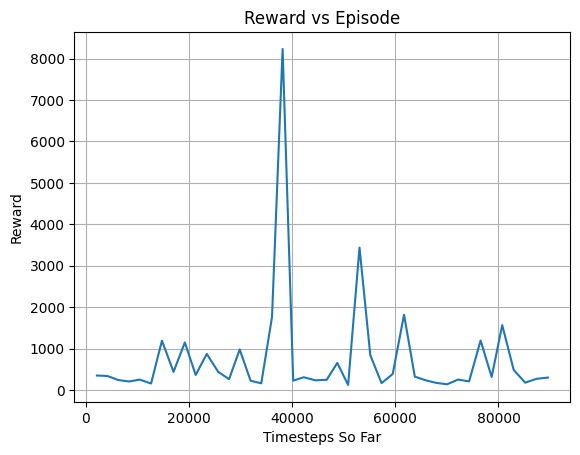

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['Timesteps So Far'], df['Average Episodic Return'])
ax.set(xlabel='Timesteps So Far', ylabel='Reward',
       title='Reward vs Episode')
ax.grid()
plt.show()


# Reward repartition


In [10]:
file_name = 'reward.csv'
df = pd.read_csv(file_name, names=['collision_reward', 'near_collision_reward','speed_reward','angular_reward','proximity_reward','total_reward'])
# only keep the first 400
df = df[:400]

df.head()

,collision_reward,near_collision_reward,speed_reward,angular_reward,proximity_reward,total_reward
0,0.0,0.0,3.589221,0.004561,-0.027384,3.566398
1,0.0,0.0,2.978517,-0.268343,-0.057282,2.652892
2,0.0,0.0,2.949300,-0.609223,-0.094213,2.245864
3,0.0,0.0,3.545515,-0.995814,-0.145749,2.403952
4,0.0,0.0,4.789878,-1.383541,-0.223537,3.182800


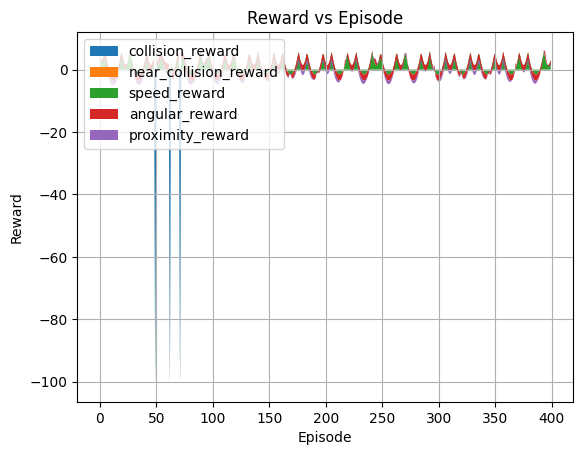

In [11]:
fig, ax = plt.subplots()
ax.stackplot(df.index, df['collision_reward'], df['near_collision_reward'], df['speed_reward'], df['angular_reward'], df['proximity_reward'], labels=['collision_reward', 'near_collision_reward','speed_reward','angular_reward','proximity_reward'])
ax.set(xlabel='Episode', ylabel='Reward',
         title='Reward vs Episode')
ax.legend(loc='upper left')
ax.grid()
plt.show()

In [ ]:
from env_component.agent import Agent, AgentGroup
from env_component.human import Human
import numpy as np
import matplotlib.pyplot as plt

nb_human = 20

for i in range(nb_human + 1):
    human = Human(0.1)

agent_visible = AgentGroup(*Agent.ENTITIES)
agent_visible.reset();

In [ ]:
other_agent_state = None
for human in Human.HUMAN_LIST:
    other_agent_state = (
        agent_visible.filter(lambda x: x.id != human.id)
        .filter(human.can_i_see)
        .apply(lambda x: x.coordinates + x.speed)
    )

len(other_agent_state)

20

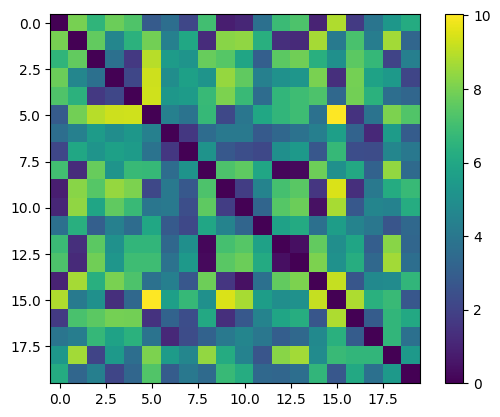

(20, 20)


In [ ]:
coordinates = np.array(agent_visible.filter(lambda x: x.id != human.id).apply(lambda x: x.coordinates))

matrix_distance_from_each_other = np.linalg.norm(coordinates[:, None] - coordinates, axis=2) 
sensor_range = np.random.uniform(0.1, 0.2, size=coordinates.shape[0])
# matrix_distance_from_each_other = matrix_distance_from_each_other < sensor_range
plt.imshow(matrix_distance_from_each_other)
plt.colorbar()
plt.show()
print(matrix_distance_from_each_other.shape)

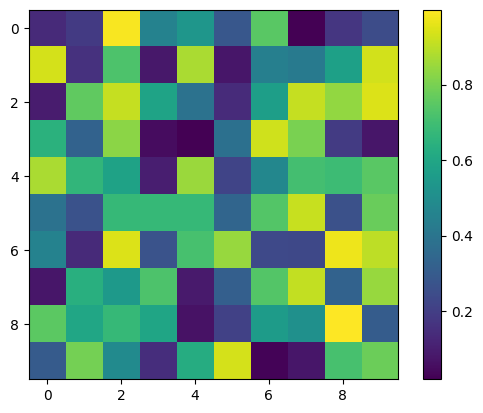

In [12]:
A = np.random.rand(10, 10)
plt.imshow(A)
plt.colorbar()
plt.show()